In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm, colors
from netCDF4 import Dataset
from datetime import timedelta
import numpy as np
import os
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
import sys

In [3]:
path = ''+'/Data/Data_ACP_article/Trajectory_data/'

In [4]:
file_all = os.listdir(path)
file = [x for x in file_all if 'combined' in x and 'v2' in x][0]

data = pd.read_parquet(path+ '/' + file)

In [6]:
file_tray = [x for x in file_all if 'alltraject' in x and 'v2' in x][0]

data_raw_tray = pd.read_parquet(path+ '/' + file_tray)

In [7]:
indexes = data.groupby(data.n).mean().index.to_numpy()
indexes

array([   81.,    82.,    83., ..., 44385., 44386., 44387.])

In [8]:
duration = data.groupby(data.n).mean().duration.to_numpy()

In [9]:
data_raw_tray['time'] = data_raw_tray.index

In [10]:
df_tray = dict()
df_tray.update({x:data_raw_tray.loc[data_raw_tray.n == x][['time', 'lon', 'lat', 'p', 'n', 'OMEGA', 'RHI', 'LWC', 'IWC']] for x in indexes})

In [11]:
df = pd.DataFrame()
for y in df_tray.values():
    df = pd.concat([df, y])

In [12]:
df = df[(df.lat != -999.99)&(df.lon != -999.99)&(df.p != -999.99)]

This provides the file traj_forEMAC.parquet, already provided in the linked Data Folder of the Repository

In [13]:
# Files of climatology

f_inpbc = Dataset(''+'/Data/Data_Extra_thesis/EMAC/Climatology_NoAmmSu/Ninp_BC_38469_201401-202112_JuneJuly_EMAC-MADE3_clim.nc')
f_inpbctag = Dataset(''+'/Data/Data_Extra_thesis/EMAC/Climatology_NoAmmSu/Ninp_BCtag_38469_201401-202112_JuneJuly_EMAC-MADE3_clim.nc')
f_inpdu = Dataset(''+'/Data/Data_Extra_thesis/EMAC/Climatology_NoAmmSu/Ninp_DU_38469_201401-202112_JuneJuly_EMAC-MADE3_clim.nc')

f_nibc = Dataset(''+'/Data/Data_Extra_thesis/EMAC/Climatology_NoAmmSu/Nice_BC_38469_201401-202112_JuneJuly_EMAC-MADE3_clim.nc')
f_nibctag = Dataset(''+'/Data/Data_Extra_thesis/EMAC/Climatology_NoAmmSu/Nice_BCtag_38469_201401-202112_JuneJuly_EMAC-MADE3_clim.nc')
f_nidu = Dataset(''+'/Data/Data_Extra_thesis/EMAC/Climatology_NoAmmSu/Nice_DU_38469_201401-202112_JuneJuly_EMAC-MADE3_clim.nc')
f_nihom = Dataset(''+'/Data/Data_Extra_thesis/EMAC/Climatology_NoAmmSu/Nice_homog_38469_201401-202112_JuneJuly_EMAC-MADE3_clim.nc')

In [14]:
f_inpbc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    info1: EMAC-MADE3 model output for comparisons with CIRRUS-HL
    info2: Average over all June/July months in simulated period
    info3: Freezing properties of INPs (S_crit, f_act): DUdep= (1.2, ); BCtag= (1.201, 0.001); DUimm= (1.35, 0.01); BC= (1.40, 0.0025); 
    EXPER: 38469
    PERIOD: 201401-202112
    Reference: Beer et al., 2023
    Creator: Christof Beer (DLR)
    Date: 2024-05-23 10:50:05
    Machine: Levante (DKRZ)
    dimensions(sizes): lon(128), lat(64), plev(41)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float64 plev(plev), float64 Ninp_BC(plev, lat, lon)
    groups: 

C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:137: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:137: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:137: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated si

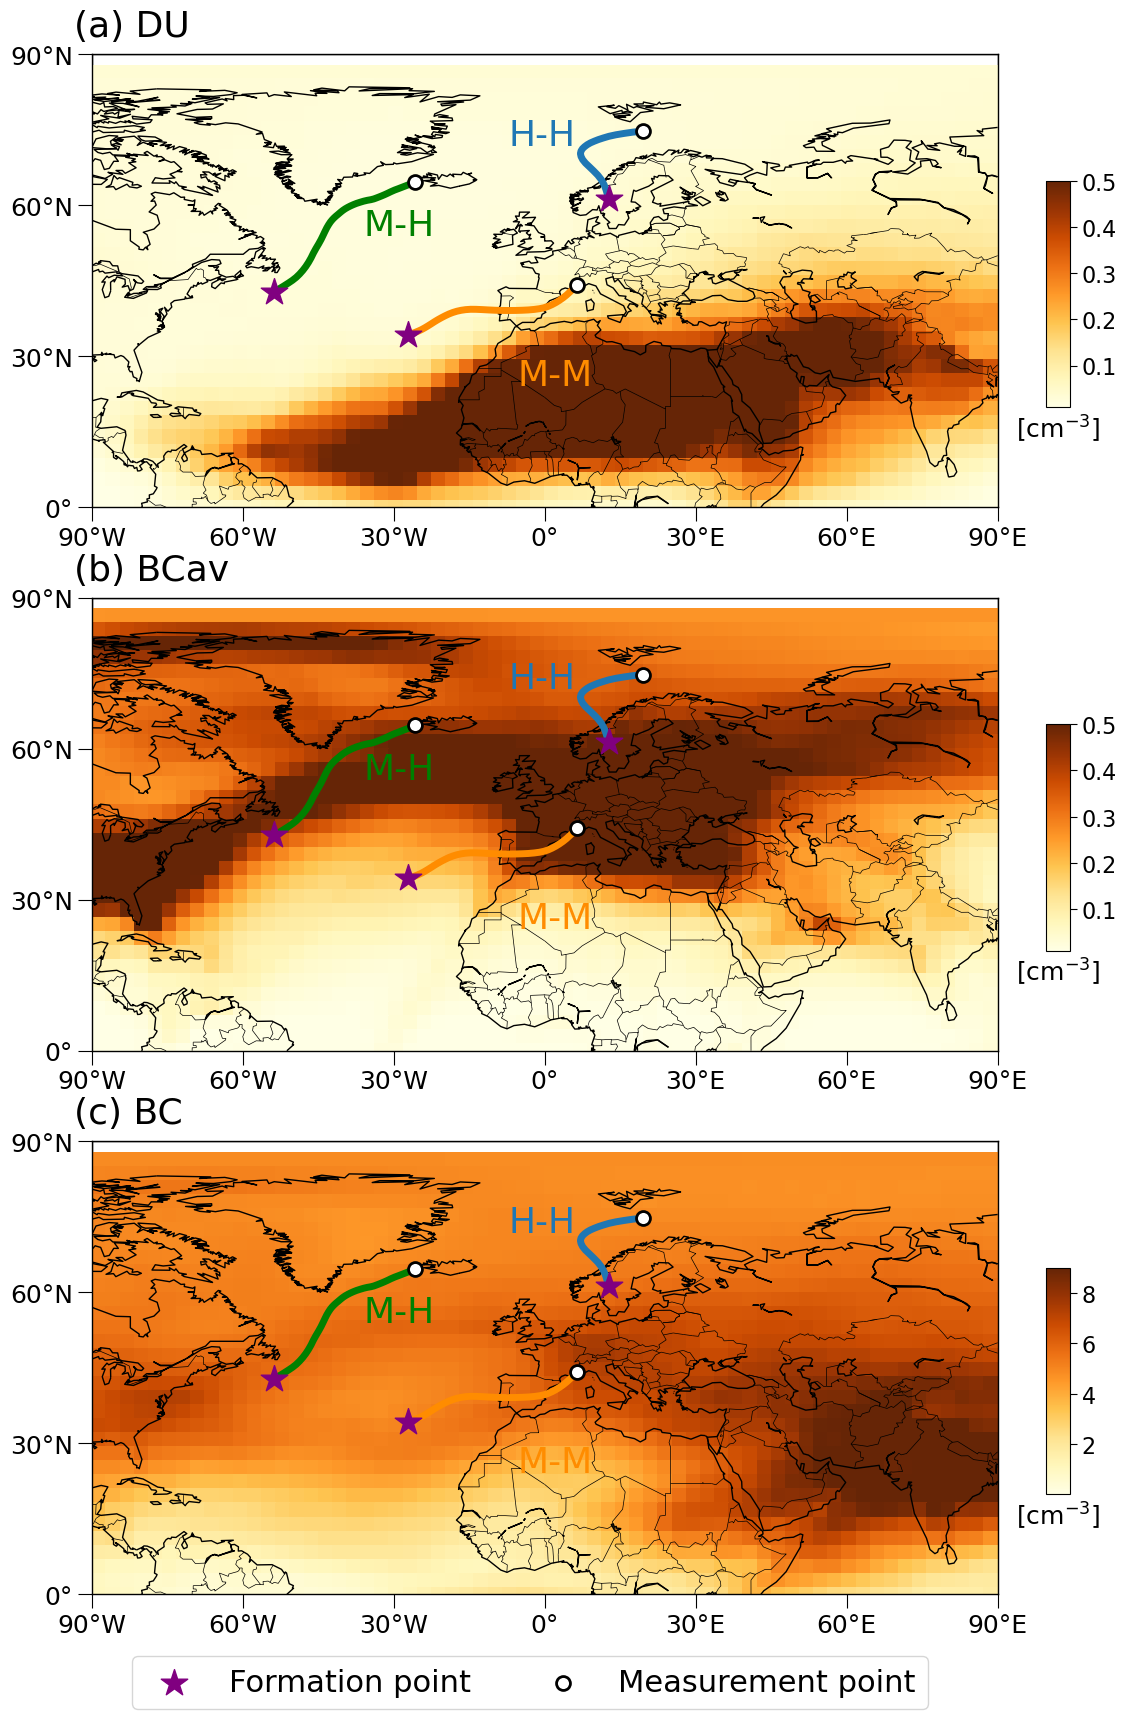

In [14]:
slev = 250
levmax = 150
levmin = 500
latmax = 90
latmin = -2
lonmax = -90
lonmin = 90

var = f_inpdu
var_name = 'Ninp_DU'
plev_arr = var.variables['plev'][:].data*0.01
lat_arr = var.variables['lat'][:].data
lon_arr = var.variables['lon'][:].data
lon_arr = [-(360-x) if x> 180 else x for x in lon_arr]
lon_arr = [-180] + lon_arr[65:] + lon_arr[:65]
lon_arr = np.array(lon_arr)

nlev = np.where(abs(plev_arr - slev) == min(abs(plev_arr -slev)))[0][0]

nlevmax = np.where(abs(plev_arr - levmax) == min(abs(plev_arr -levmax)))[0][0]
nlevmin = np.where(abs(plev_arr - levmin) == min(abs(plev_arr -levmin)))[0][0]

nlatmax = np.where(abs(lat_arr - latmax) == min(abs(lat_arr -latmax)))[0][0]
nlatmin = np.where(abs(lat_arr - latmin) == min(abs(lat_arr -latmin)))[0][0]

nlonmax = np.where(abs(lon_arr - lonmax) == min(abs(lon_arr -lonmax)))[0][0]
nlonmin = np.where(abs(lon_arr - lonmin) == min(abs(lon_arr -lonmin)))[0][0]

lat_arr = lat_arr[nlatmax:nlatmin+1]
lon_arr = lon_arr[nlonmax:nlonmin+1]

#conc = np.zeros((64, 129))
#conc[:, 0] = var.variables[var_name][nlev, :, 64].data
#conc[:, 1:64] = var.variables[var_name][nlev, :, 65:].data
#conc[:, 64:] = var.variables[var_name][nlev, :, :65].data

#### for average between levels

conc= np.zeros((nlevmin-nlevmax+1, 64, 129))
conc[:, :, 0] = var.variables[var_name][nlevmax:nlevmin+1, :, 64].data
conc[:, :, 1:64] = var.variables[var_name][nlevmax:nlevmin+1, :, 65:].data
conc[:, :, 64:] = var.variables[var_name][nlevmax:nlevmin+1, :, :65].data

conc = conc[:, nlatmax:nlatmin+1, nlonmax:nlonmin+1]

#conc = np.where(conc > 1e17, np.nan, conc)
#conc = ma.masked_where(np.isnan(conc), conc)
conc = np.mean(conc, axis=0)

conc_all = []
conc_all.append(conc)

var = f_inpbctag
var_name = 'Ninp_BCtag'

conc= np.zeros((nlevmin-nlevmax+1, 64, 129))
conc[:, :, 0] = var.variables[var_name][nlevmax:nlevmin+1, :, 64].data
conc[:, :, 1:64] = var.variables[var_name][nlevmax:nlevmin+1, :, 65:].data
conc[:, :, 64:] = var.variables[var_name][nlevmax:nlevmin+1, :, :65].data

conc = conc[:, nlatmax:nlatmin+1, nlonmax:nlonmin+1]

#conc = np.where(conc > 1e17, np.nan, conc)
#conc = ma.masked_where(np.isnan(conc), conc)
conc = np.mean(conc, axis=0)

conc_all.append(conc)

var = f_inpbc
var_name = 'Ninp_BC'

conc= np.zeros((nlevmin-nlevmax+1, 64, 129))
conc[:, :, 0] = var.variables[var_name][nlevmax:nlevmin+1, :, 64].data
conc[:, :, 1:64] = var.variables[var_name][nlevmax:nlevmin+1, :, 65:].data
conc[:, :, 64:] = var.variables[var_name][nlevmax:nlevmin+1, :, :65].data

conc = conc[:, nlatmax:nlatmin+1, nlonmax:nlonmin+1]

#conc = np.where(conc > 1e17, np.nan, conc)
#conc = ma.masked_where(np.isnan(conc), conc)
conc = np.mean(conc, axis=0)

conc_all.append(conc)

#######

fig = plt.figure(figsize=(12, 20))
gs = GridSpec(3,1, hspace=0.2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3= fig.add_subplot(gs[2, 0], sharex=ax1)
axes = [ax1, ax2, ax3]

for i, (ax, conc) in enumerate(zip(axes, conc_all)):
    m = Basemap(projection='cyl', resolution='c', llcrnrlat=0, urcrnrlat=90, llcrnrlon=-90, urcrnrlon=90, ax=ax)
    
    # Draw coastlines, countries, and boundaries
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary()

    #m.drawparallels(np.arange(-90., 91.,30.), labels=[1, 0, 1, 0], fontsize=18, linewidth=.1)
    #m.drawmeridians(np.arange(-180.,180.,30.), labels=[0, 1, 0, 1], fontsize=18, linewidth=.1)
    
    # Customize tick labels for latitude and longitude
    m.drawparallels([], labels=[True, False, False, False])
    m.drawmeridians([], labels=[False, False, False, True])
    
    ind_mm = 5199
    ind_mh = 19337
    ind_hh = 15132
    m.plot(df[df.n==ind_hh].iloc[:24].lon, df[df.n==ind_hh].iloc[:24].lat, color='C0', linewidth=5)
    m.plot(df[df.n==ind_mh].iloc[:48].lon, df[df.n==ind_mh].iloc[:48].lat, color='green', linewidth=5)
    m.plot(df[df.n==ind_mm].iloc[:38].lon, df[df.n==ind_mm].iloc[:38].lat, color='darkorange', linewidth=5)

    # Create meshgrid for latitudes and longitudes
    lon_grid, lat_grid = np.meshgrid(lon_arr, lat_arr)

    # Convert latitudes and longitudes to map coordinates
    x, y = m(lon_grid, lat_grid)
    
    if i < 2:
        norm = colors.Normalize(vmin=0.01, vmax=0.5)
        #norm = colors.LogNorm(vmin=0.001, vmax=30)
    else:
        norm = colors.Normalize(vmin=0.01, vmax=9)
        #norm = colors.LogNorm(vmin=0.001, vmax=30)


    # Plot the data using pcolormesh
    cmap = matplotlib.cm.get_cmap('YlOrBr') #.reversed()
    pcm = m.pcolormesh(x, y, conc*1e-6, cmap=cmap, norm=norm)
    m.scatter(df[df.n==ind_hh].iloc[24].lon, df[df.n==ind_hh].iloc[24].lat, latlon=True,
           c='purple', zorder=3, s=400, marker='*', label='Formation point')
    m.scatter(df[df.n==ind_mh].iloc[48].lon, df[df.n==ind_mh].iloc[48].lat, latlon=True,
           c='purple', zorder=3, s=400, marker='*')
    m.scatter(df[df.n==ind_mm].iloc[38].lon, df[df.n==ind_mm].iloc[38].lat, latlon=True,
           c='purple', zorder=3, s=400, marker='*')
    
    m.scatter(df[df.n==ind_hh].iloc[0].lon, df[df.n==ind_hh].iloc[0].lat, latlon=True,
           c='white', zorder=3, s=100, marker='o', label='Measurement point', edgecolor='black', linewidth=2)
    m.scatter(df[df.n==ind_mh].iloc[0].lon, df[df.n==ind_mh].iloc[0].lat, latlon=True,
           c='white', zorder=3, s=100, marker='o', edgecolor='black', linewidth=2)
    m.scatter(df[df.n==ind_mm].iloc[0].lon, df[df.n==ind_mm].iloc[0].lat, latlon=True,
           c='white', zorder=3, s=100, marker='o', edgecolor='black', linewidth=2)

    # Add colorbar
    pos0 = ax.get_position()
    cbar_ax = fig.add_axes([0.93, pos0.y0 + 0.05, 0.02, pos0.height/2])
    cbar = fig.colorbar(pcm, cax=cbar_ax)
    cbar_ax.set_xlabel(r'$\mathrm{[cm^{-3}]}$', fontsize=18)
    cbar_ax.tick_params(axis='both', which='major', labelsize=16, length=5)
    
    ax.tick_params(axis='both', which='major', labelsize=18, length=10)
    plt.setp(ax.get_yticklabels(), visible=False)
    
    # Set the tick labels to use the 90°N, etc. format
    ax.set_yticks([ 0, 30, 60, 90])
    ax.set_yticklabels(['0°', '30°N', '60°N', '90°N'])
    ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])
    ax.set_xticklabels(['90°W', '60°W', '30°W', '0°', '30°E', '60°E', '90°E'])
    
    ax.annotate('M-M', xy=(0.47, 0.27), xycoords='axes fraction', fontsize=26, color='darkorange')
    ax.annotate('M-H', xy=(0.30, 0.6), xycoords='axes fraction', fontsize=26, color='green')
    ax.annotate('H-H', xy=(0.46, 0.8), xycoords='axes fraction', fontsize=26, color='C0')
 

handels, labels = ax2.get_legend_handles_labels()
fig.legend(handels, labels, fontsize=22, ncol=2, bbox_to_anchor=(0.5,0.045), loc='lower center')
    
    
#cbar_ax.yaxis.set_ticks_position('right')

# Add a title
#plt.title('World Map with Species Concentration')


ax1.annotate('(a) DU', xy=(-0.02, 1.04), xycoords='axes fraction', fontsize=26)
ax2.annotate('(b) BCav', xy=(-0.02, 1.04), xycoords='axes fraction', fontsize=26)
ax3.annotate('(c) BC', xy=(-0.02, 1.04), xycoords='axes fraction', fontsize=26)

# Show the plot
plt.show()


This is only adviceable for climatology data, the 1-hour output needs to be calculated separately e.g. in a cluster, here takes too long. The output file for 1-h is loaded later for the further calculations.

In [7]:
# All variables (climatology)

plev_arr = f_nidu.variables['plev'][:].data*0.01
lat_arr = f_nidu.variables['lat'][:].data
lon_arr = f_nidu.variables['lon'][:].data

#lon_arr = [-(x-180) if x> 180 else x for x in lon_arr] # modified
lon_arr = [-(360-x) if x> 180 else x for x in lon_arr]
lon_arr = lon_arr[65:] + lon_arr[:65]

ni_BCtag = np.zeros(np.shape(f_nibctag.variables['Nice_BCtag'][:].data))
ni_BCtag[:, :, :63] = f_nibctag.variables['Nice_BCtag'][:, :, 65:].data
ni_BCtag[:, :, 63:] = f_nibctag.variables['Nice_BCtag'][:, :, :65].data

inp_BCtag = np.zeros(np.shape(f_inpbctag.variables['Ninp_BCtag'][:].data))
inp_BCtag[:, :, :63] = f_inpbctag.variables['Ninp_BCtag'][:, :, 65:].data
inp_BCtag[:, :, 63:] = f_inpbctag.variables['Ninp_BCtag'][:, :, :65].data

ni_BC = np.zeros(np.shape(f_nibc.variables['Nice_BC'][:].data))
ni_BC[:, :, :63] = f_nibc.variables['Nice_BC'][:, :, 65:].data
ni_BC[:, :, 63:] = f_nibc.variables['Nice_BC'][:, :, :65].data

inp_BC = np.zeros(np.shape(f_inpbc.variables['Ninp_BC'][:].data))
inp_BC[:, :, :63] = f_inpbc.variables['Ninp_BC'][:, :, 65:].data
inp_BC[:, :, 63:] = f_inpbc.variables['Ninp_BC'][:, :, :65].data

ni_DU = np.zeros(np.shape(f_nidu.variables['Nice_DU'][:].data))
ni_DU[:, :, :63] = f_nidu.variables['Nice_DU'][:, :, 65:].data
ni_DU[:, :, 63:] = f_nidu.variables['Nice_DU'][:, :, :65].data

inp_DU = np.zeros(np.shape(f_inpdu.variables['Ninp_DU'][:].data))
inp_DU[:, :, :63] = f_inpdu.variables['Ninp_DU'][:, :, 65:].data
inp_DU[:, :, 63:] = f_inpdu.variables['Ninp_DU'][:, :, :65].data

ni_HOM = np.zeros(np.shape(f_nihom.variables['Nice_homog'][:].data))
ni_HOM[:, :, :63] = f_nihom.variables['Nice_homog'][:, :, 65:].data
ni_HOM[:, :, 63:] = f_nihom.variables['Nice_homog'][:, :, :65].data

In [12]:
df['Ni_BCtag'] = -999
df['Inp_BCtag'] = -999
df['Ni_BC'] = -999
df['Inp_BC'] = -999
df['Ni_DU'] = -999
df['Inp_DU'] = -999
df['Ni_HOM'] = -999.

for i in range(len(df)):    
    lat_j = np.where(abs(lat_arr -df.iloc[i].lat) == min(abs(lat_arr -df.iloc[i].lat)))[0][0]
    lon_j = np.where(abs(lon_arr -df.iloc[i].lon) == min(abs(lon_arr -df.iloc[i].lon)))[0][0]
    plev_j = np.where(abs(plev_arr -df.iloc[i].p) == min(abs(plev_arr -df.iloc[i].p)))[0][0]
    #print(df.iloc[i], lat_arr[lat_j], lon_arr[lon_j], plev_arr[plev_j])
    df['Ni_BCtag'].iloc[i] = ni_BCtag[plev_j, lat_j, lon_j]
    df['Inp_BCtag'].iloc[i] = inp_BCtag[plev_j, lat_j, lon_j]
    df['Ni_BC'].iloc[i] = ni_BC[plev_j, lat_j, lon_j]
    df['Inp_BC'].iloc[i] = inp_BC[plev_j, lat_j, lon_j]
    df['Ni_DU'].iloc[i] = ni_DU[plev_j, lat_j, lon_j]
    df['Inp_DU'].iloc[i] = inp_DU[plev_j, lat_j, lon_j]
    df['Ni_HOM'].iloc[i] = ni_HOM[ plev_j, lat_j, lon_j]

C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


KeyboardInterrupt: 

In [324]:
# Check for fill values and substitute by np.nan
df['Ni_BCtag'].loc[df['Ni_BCtag'] > 1e19] = np.nan
df['Inp_BCtag'].loc[df['Inp_BCtag'] > 1e19] = np.nan
df['Ni_BC'].loc[df['Ni_BC'] > 1e19] = np.nan
df['Inp_BC'].loc[df['Inp_BC'] > 1e19] = np.nan
df['Ni_DU'].loc[df['Ni_DU'] > 1e19] = np.nan
df['Inp_DU'].loc[df['Inp_DU'] > 1e19] = np.nan
df['Ni_HOM'].loc[df['Ni_HOM'] > 1e19] = np.nan


df['Inp_BCtag'] = df['Inp_BCtag']*1e-6
df['Inp_BC'] = df['Inp_BC']*1e-6
df['Inp_DU'] = df['Inp_DU']*1e-6

In [325]:
#df.to_parquet('D:/Flights_CIRRUS_HL/Combined/Statistics/Data/combi_emac_avg_clim_070424.parquet')

In [15]:
df_clim = pd.read_parquet(''+'/Data/Data_Extra_thesis//EMAC/combi_emac_traj_clim.parquet')

In [317]:
df_1h = pd.read_parquet(''+'/Data/Data_Extra_thesis/EMAC/combi_emac_traj_1h.parquet')

In [9]:
index_all = list(set(data.n))
duration_all = [int(data[data.n == x].duration.mean()) for x in index_all]

In [19]:
Inp_DU_m = np.zeros(len(index_all))
Inp_DU_form = np.zeros(len(index_all))
Inp_BCtag_m = np.zeros(len(index_all))
Inp_BCtag_form = np.zeros(len(index_all))
Inp_BC_m = np.zeros(len(index_all))
Inp_BC_form = np.zeros(len(index_all))

Nice_DU_s = np.zeros(len(index_all))
Nice_BCtag_s = np.zeros(len(index_all))
Nice_BC_s = np.zeros(len(index_all))
Nice_HOM_s = np.zeros(len(index_all))

Nice_DU_dict = dict()
Nice_BCtag_dict = dict()
Nice_BC_dict = dict()
Nice_HOM_dict = dict()

mean_N_is = np.zeros(len(index_all))
mean_ED_is = np.zeros(len(index_all))
mean_IWC_is = np.zeros(len(index_all))
mean_Ts_is = np.zeros(len(index_all))
mean_alt = np.zeros(len(index_all))
mean_RHice = np.zeros(len(index_all))
mean_timestamp = []
mean_type = np.zeros(len(index_all))
mean_lat_meas = np.zeros(len(index_all))
mean_lon_meas = np.zeros(len(index_all))
mean_lat_f = np.zeros(len(index_all))
mean_lat_f = np.zeros(len(index_all))
mean_updraft_is = np.zeros(len(index_all))
updraft_form = np.zeros(len(index_all))

df_calc = df_clim

for i, (x, h) in enumerate(zip(index_all, duration_all)):
    
    DU_values = df_calc[df_calc.n == x].Inp_DU.iloc[:h+1]
    BCtag_values = df_calc[df_calc.n == x].Inp_BCtag.iloc[:h+1]
    BC_values = df_calc[df_calc.n == x].Inp_BC.iloc[:h+1]
    
    
    #Inp_DU_m[i] = DU_values.mean()
    #Inp_BCtag_m[i] = BCtag_values.mean()
    #Inp_BC_m[i] = BC_values.mean()
    Inp_DU_m[i] = DU_values.median()
    Inp_BCtag_m[i] = BCtag_values.median()
    Inp_BC_m[i] = BC_values.median()
    
    #Nice_DU_m[i] = DU_values.mean()
    #Nice_BCtag_m[i] = BCtag_values.mean()
    #Nice_BC_m[i] = BC_values.mean()
    
    NiceDU_values = df_calc[df_calc.n == x].Ni_DU.iloc[:h+1]
    NiceBCtag_values = df_calc[df_calc.n == x].Ni_BCtag.iloc[:h+1]
    NiceBC_values = df_calc[df_calc.n == x].Ni_BC.iloc[:h+1]
    NiceHOM_values = df_calc[df_calc.n == x].Ni_HOM.iloc[:h+1]
    
    Nice_DU_s[i] = NiceDU_values.sum()
    Nice_BCtag_s[i] = NiceBCtag_values.sum()
    Nice_BC_s[i] = NiceBC_values.sum()
    Nice_HOM_s[i] = NiceHOM_values.sum()
    
    Nice_DU_m[i] = DU_values.median()
    Nice_BCtag_m[i] = BCtag_values.median()
    Nice_BC_m[i] = BC_values.median()
    Nice_HOM_m[i] = NiceHOM_values.median()
    
    
    Inp_DU_form[i] = df_calc[df_calc.n == x].Inp_DU.iloc[h]
    Inp_BCtag_form[i] = df_calc[df_calc.n == x].Inp_BCtag.iloc[h]
    Inp_BC_form[i] = df_calc[df_calc.n == x].Inp_BC.iloc[h]
    
    
    mean_N_is[i] = data[data.n == x].N_0_is.mean()
    mean_ED_is[i] = data[data.n == x].ED_0_is.mean()
    mean_IWC_is[i] = data[data.n == x].IWC_0_is.mean()
    mean_Ts_is[i] = data[data.n == x].Ts_is.mean()
    mean_alt[i] = data[data.n == x].irs_altitude.mean()
    mean_RHice[i] = data[data.n == x].RH_ice.mean()
    mean_timestamp.append(data[data.n == x].index.mean())
    mean_type[i] = int(data[data.n == x].type.mean())
    mean_lat_meas[i] = data[data.n == x].lat_o_is.mean()
    mean_lon_meas[i] = data[data.n == x].lon_o_is.mean()
    mean_lat_f[i] = data[data.n == x].lat_f.mean()
    mean_lat_f[i] = data[data.n == x].lat_f.mean()
    mean_updraft_is[i] = data[data.n == x].updraft_is.mean()
    updraft_form[i] = data[data.n == x].updraft_form.mean()
    
    Nice_DU_dict.update({i:pd.DataFrame({'Ni' : NiceDU_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    Nice_BCtag_dict.update({i:pd.DataFrame({'Ni' : NiceBCtag_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    Nice_BC_dict.update({i:pd.DataFrame({'Ni' : NiceBC_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    Nice_HOM_dict.update({i:pd.DataFrame({'Ni' : NiceHOM_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    
df_combi = pd.DataFrame({'n':index_all, 'Lifetime':duration_all, 'Inp_DU_m':Inp_DU_m, 'Inp_DU_form':Inp_DU_form,
                         'Inp_BCav_m':Inp_BCtag_m, 'Inp_BCav_form':Inp_BCtag_form, 'Nice_HOMsum':Nice_HOM_s, 
                         'Nice_DUsum':Nice_DU_s, 'Nice_BCtagsum':Nice_BCtag_s, 'Nice_BCsum':Nice_BC_s,
                         'Nice_HOM_m':Nice_HOM_m, 'Nice_DU_m':Nice_DU_m, 'Nice_BCtag_m':Nice_BCtag_m, 'Nice_BC_m':Nice_BC_m,
                         'Inp_BC_m':Inp_BC_m, 'Inp_BC_form':Inp_BC_form, 'Lat_meas': mean_lat_meas,
                         'Lon_meas': mean_lon_meas, 'Lat_f': mean_lat_f, 'Lon_f': mean_lat_f,
                        'N_is_mean': mean_N_is, 'ED_is_mean': mean_ED_is, 'IWC_is_mean': mean_IWC_is,
                        'Ts_is_mean': mean_Ts_is, 'Altitude_mean': mean_alt, 'RHice_mean': mean_RHice,
                        'type':mean_type, 'updraft_f': updraft_form, 'updraft_is': mean_updraft_is}, index=mean_timestamp)
df_combi.index = df_combi.index.round(freq='S')

In [ ]:
Inp_DU_m = np.zeros(len(index_all))
Inp_DU_form = np.zeros(len(index_all))
Inp_BCtag_m = np.zeros(len(index_all))
Inp_BCtag_form = np.zeros(len(index_all))
Inp_BC_m = np.zeros(len(index_all))
Inp_BC_form = np.zeros(len(index_all))

Nice_DU_s = np.zeros(len(index_all))
Nice_BCtag_s = np.zeros(len(index_all))
Nice_BC_s = np.zeros(len(index_all))
Nice_HOM_s = np.zeros(len(index_all))

Nice_DU_dict = dict()
Nice_BCtag_dict = dict()
Nice_BC_dict = dict()
Nice_HOM_dict = dict()

mean_N_is = np.zeros(len(index_all))
mean_ED_is = np.zeros(len(index_all))
mean_IWC_is = np.zeros(len(index_all))
mean_Ts_is = np.zeros(len(index_all))
mean_alt = np.zeros(len(index_all))
mean_RHice = np.zeros(len(index_all))
mean_timestamp = []
mean_type = np.zeros(len(index_all))
mean_lat_meas = np.zeros(len(index_all))
mean_lon_meas = np.zeros(len(index_all))
mean_lat_f = np.zeros(len(index_all))
mean_lat_f = np.zeros(len(index_all))
mean_updraft_is = np.zeros(len(index_all))
updraft_form = np.zeros(len(index_all))

df_calc = df_1h

for i, (x, h) in enumerate(zip(index_all, duration_all)):
    
    DU_values = df_calc[df_calc.n == x].Inp_DU.iloc[:h+1]
    BCtag_values = df_calc[df_calc.n == x].Inp_BCtag.iloc[:h+1]
    BC_values = df_calc[df_calc.n == x].Inp_BC.iloc[:h+1]
    
    
    #Inp_DU_m[i] = DU_values.mean()
    #Inp_BCtag_m[i] = BCtag_values.mean()
    #Inp_BC_m[i] = BC_values.mean()
    Inp_DU_m[i] = DU_values.median()
    Inp_BCtag_m[i] = BCtag_values.median()
    Inp_BC_m[i] = BC_values.median()
    
    #Nice_DU_m[i] = DU_values.mean()
    #Nice_BCtag_m[i] = BCtag_values.mean()
    #Nice_BC_m[i] = BC_values.mean()
    
    NiceDU_values = df_calc[df_calc.n == x].Ni_DU.iloc[:h+1]
    NiceBCtag_values = df_calc[df_calc.n == x].Ni_BCtag.iloc[:h+1]
    NiceBC_values = df_calc[df_calc.n == x].Ni_BC.iloc[:h+1]
    NiceHOM_values = df_calc[df_calc.n == x].Ni_HOM.iloc[:h+1]
    
    Nice_DU_s[i] = NiceDU_values.sum()
    Nice_BCtag_s[i] = NiceBCtag_values.sum()
    Nice_BC_s[i] = NiceBC_values.sum()
    Nice_HOM_s[i] = NiceHOM_values.sum()
    
    Nice_DU_m[i] = DU_values.median()
    Nice_BCtag_m[i] = BCtag_values.median()
    Nice_BC_m[i] = BC_values.median()
    Nice_HOM_m[i] = NiceHOM_values.median()
    
    
    Inp_DU_form[i] = df_calc[df_calc.n == x].Inp_DU.iloc[h]
    Inp_BCtag_form[i] = df_calc[df_calc.n == x].Inp_BCtag.iloc[h]
    Inp_BC_form[i] = df_calc[df_calc.n == x].Inp_BC.iloc[h]
    
    
    mean_N_is[i] = data[data.n == x].N_0_is.mean()
    mean_ED_is[i] = data[data.n == x].ED_0_is.mean()
    mean_IWC_is[i] = data[data.n == x].IWC_0_is.mean()
    mean_Ts_is[i] = data[data.n == x].Ts_is.mean()
    mean_alt[i] = data[data.n == x].irs_altitude.mean()
    mean_RHice[i] = data[data.n == x].RH_ice.mean()
    mean_timestamp.append(data[data.n == x].index.mean())
    mean_type[i] = int(data[data.n == x].type.mean())
    mean_lat_meas[i] = data[data.n == x].lat_o_is.mean()
    mean_lon_meas[i] = data[data.n == x].lon_o_is.mean()
    mean_lat_f[i] = data[data.n == x].lat_f.mean()
    mean_lat_f[i] = data[data.n == x].lat_f.mean()
    mean_updraft_is[i] = data[data.n == x].updraft_is.mean()
    updraft_form[i] = data[data.n == x].updraft_form.mean()
    
    Nice_DU_dict.update({i:pd.DataFrame({'Ni' : NiceDU_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    Nice_BCtag_dict.update({i:pd.DataFrame({'Ni' : NiceBCtag_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    Nice_BC_dict.update({i:pd.DataFrame({'Ni' : NiceBC_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    Nice_HOM_dict.update({i:pd.DataFrame({'Ni' : NiceHOM_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    
df_combi_1h = pd.DataFrame({'n':index_all, 'Lifetime':duration_all, 'Inp_DU_m':Inp_DU_m, 'Inp_DU_form':Inp_DU_form,
                         'Inp_BCav_m':Inp_BCtag_m, 'Inp_BCav_form':Inp_BCtag_form, 'Nice_HOMsum':Nice_HOM_s, 
                         'Nice_DUsum':Nice_DU_s, 'Nice_BCtagsum':Nice_BCtag_s, 'Nice_BCsum':Nice_BC_s,
                         'Nice_HOM_m':Nice_HOM_m, 'Nice_DU_m':Nice_DU_m, 'Nice_BCtag_m':Nice_BCtag_m, 'Nice_BC_m':Nice_BC_m,
                         'Inp_BC_m':Inp_BC_m, 'Inp_BC_form':Inp_BC_form, 'Lat_meas': mean_lat_meas,
                         'Lon_meas': mean_lon_meas, 'Lat_f': mean_lat_f, 'Lon_f': mean_lat_f,
                        'N_is_mean': mean_N_is, 'ED_is_mean': mean_ED_is, 'IWC_is_mean': mean_IWC_is,
                        'Ts_is_mean': mean_Ts_is, 'Altitude_mean': mean_alt, 'RHice_mean': mean_RHice,
                        'type':mean_type, 'updraft_f': updraft_form, 'updraft_is': mean_updraft_is}, index=mean_timestamp)
df_combi_1h.index = df_combi.index.round(freq='S')

In [ ]:
Nice_DU_dict = dict()
Nice_BCtag_dict = dict()
Nice_BC_dict = dict()
Nice_HOM_dict = dict()

mean_lat_meas = np.zeros(len(index_all))
mean_lat_f = np.zeros(len(index_all))


for i, (x, h) in enumerate(zip(index_all, duration_all)):
    
    mean_lat_meas[i] = data[data.n == x].lat_o_is.mean()
    mean_lat_f[i] = data[data.n == x].lat_f.mean()
    
    NiceDU_values = df[df.n == x].Ni_DU.iloc[:h+1]
    NiceBCtag_values = df[df.n == x].Ni_BCtag.iloc[:h+1]
    NiceBC_values = df[df.n == x].Ni_BC.iloc[:h+1]
    NiceHOM_values = df[df.n == x].Ni_HOM.iloc[:h+1]
    
    
    Nice_DU_dict.update({i:pd.DataFrame({'Ni' : NiceDU_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    Nice_BCtag_dict.update({i:pd.DataFrame({'Ni' : NiceBCtag_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    Nice_BC_dict.update({i:pd.DataFrame({'Ni' : NiceBC_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})
    Nice_HOM_dict.update({i:pd.DataFrame({'Ni' : NiceHOM_values, 'Lat_f' : mean_lat_f[i], 'Lat_m' : mean_lat_meas[i]})})

In [ ]:
df_NiDU = pd.DataFrame()
for y in Nice_DU_dict.values():
    df_NiDU = pd.concat([df_NiDU, y], ignore_index=True)

df_NiBC = pd.DataFrame()
for y in Nice_BC_dict.values():
    df_NiBC = pd.concat([df_NiBC, y], ignore_index=True)
    
df_NiBCtag = pd.DataFrame()
for y in Nice_BCtag_dict.values():
    df_NiBCtag = pd.concat([df_NiBCtag, y], ignore_index=True)
    
df_NiHOM = pd.DataFrame()
for y in Nice_HOM_dict.values():
    df_NiHOM = pd.concat([df_NiHOM, y], ignore_index=True)
    
df_NiCV = pd.DataFrame()
for y in Nice_CV_dict.values():
    df_NiCV = pd.concat([df_NiCV, y], ignore_index=True)

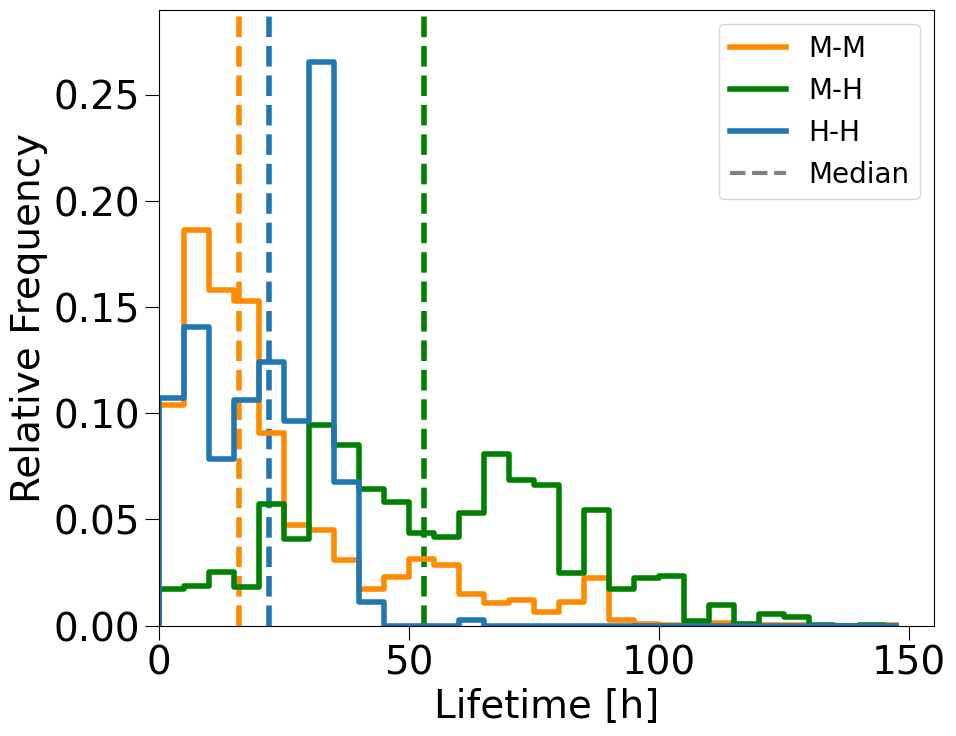

In [11]:
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot()

xmin = -5
xmax = 150

edges = np.linspace(xmin, xmax, num=32)
mids = (edges[:-1] + edges[1:])/2

sel = 'Lifetime'

ins = (df_combi.type == 1)
liq = (df_combi.type == 0)
mh = (df_combi.Lat_meas >= 60)&(df_combi.Lat_f < 60)
mm = (df_combi.Lat_meas < 60)&(df_combi.Lat_f < 60)
hh = (df_combi.Lat_meas >= 60)&(df_combi.Lat_f >= 60)

median_ins = df_combi[ins][sel].median()
median_liq = df_combi[liq][sel].median()

median_insmm = df_combi[ins&mm][sel].median()
median_liqmm = df_combi[liq&mm][sel].median()
median_insmh = df_combi[ins&mh][sel].median()
median_liqmh = df_combi[liq&mh][sel].median()
median_inshh = df_combi[ins&hh][sel].median()
median_liqhh = df_combi[liq&hh][sel].median()

hDUins, edges = np.histogram(df_combi[ins][sel], bins=edges)
hDUliq, edges = np.histogram(df_combi[liq][sel], bins=edges)

hDUmm, edges = np.histogram(df_combi[mm][sel], bins=edges)
hDUmh, edges = np.histogram(df_combi[mh][sel], bins=edges)
hDUhh, edges = np.histogram(df_combi[hh][sel], bins=edges)

hDUins = hDUins/hDUins.sum()
hDUliq = hDUliq/hDUliq.sum()

hDUmm = hDUmm/hDUmm.sum()
hDUmh = hDUmh/hDUmh.sum()
hDUhh = hDUhh/hDUhh.sum()

#ax1.semilogy(mids, hDUins, color='lightblue', drawstyle='steps-mid', label='In situ o.', linewidth=4)
#ax1.semilogy(mids, hDUliq, color='navy', drawstyle='steps-mid', label='Liquid o.', linewidth=4)

ax1.semilogy(mids, hDUmm, color='darkorange', drawstyle='steps-mid', label='M-M', linewidth=4)
ax1.semilogy(mids, hDUmh, color='green', drawstyle='steps-mid', label='M-H', linewidth=4)
ax1.semilogy(mids, hDUhh, color='C0', drawstyle='steps-mid', label='H-H', linewidth=4)

ax1.vlines(df_combi[mm][sel].median(), 0, 0.29, linestyle='dashed', color='darkorange', linewidth=4)
ax1.vlines(df_combi[mh][sel].median(), 0, 0.29, linestyle='dashed', color='green', linewidth=4)
ax1.vlines(df_combi[hh][sel].median(), 0, 0.29, linestyle='dashed', color='C0', linewidth=4)

ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlim(left=0)
ax1.set_ylim(0, 0.29)
ax1.set_xlabel('Lifetime [h]', fontsize=28)
ax1.set_ylabel('Relative Frequency', fontsize=28)

ax1.tick_params(axis='both', which='major', length=10, labelsize=28)
ax1.tick_params(axis='both', which='minor', length=5)

custom = Line2D([], [], color='gray', lw=3, linestyle='dashed', label='Median')

handles, labels = ax1.get_legend_handles_labels()
handles.append(custom)
labels.append('Median')

ax1.legend(handles, labels, fontsize=20)

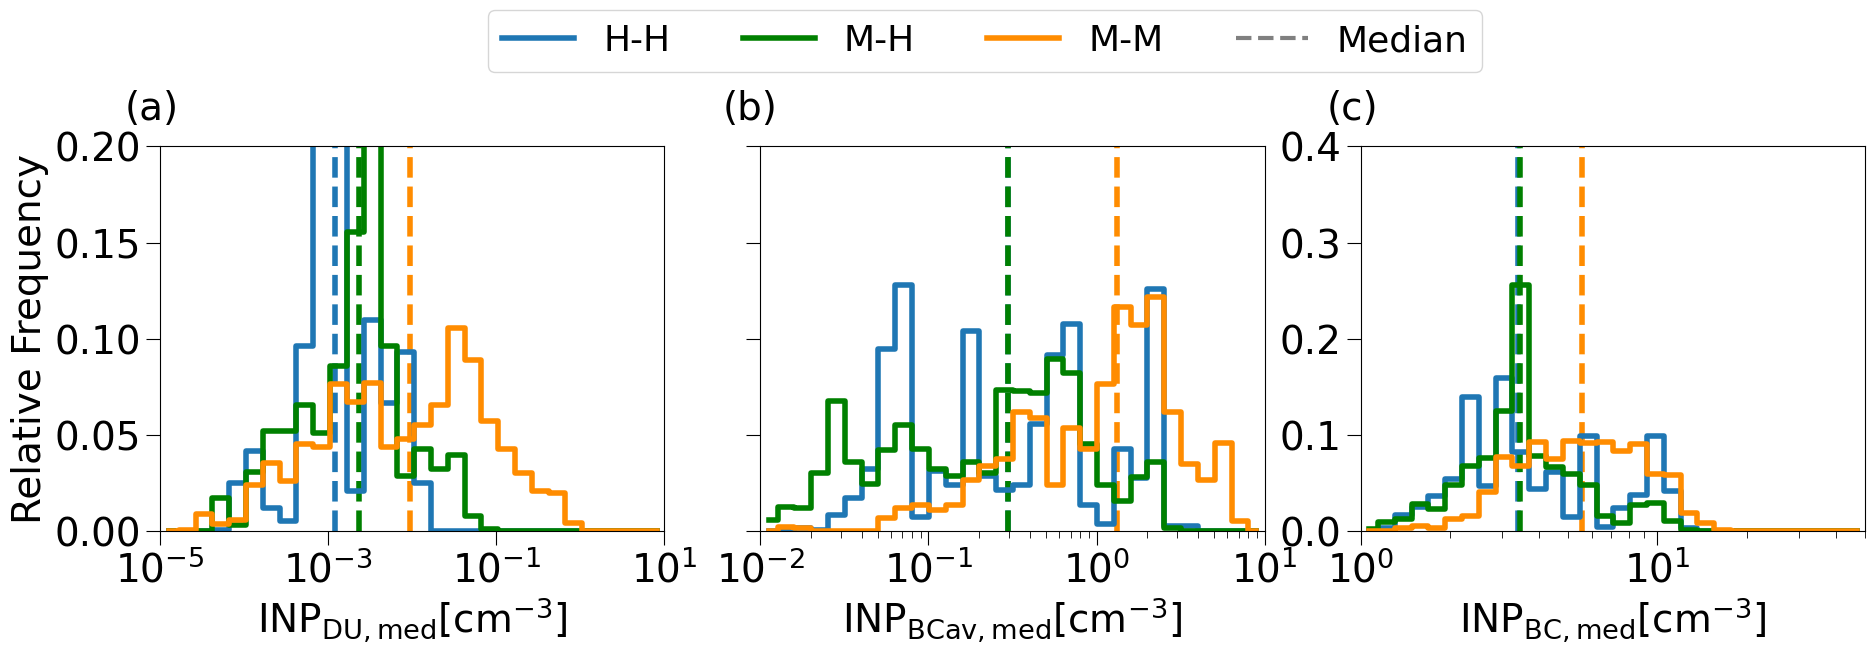

In [32]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(22,5))
gs = GridSpec(1,3, hspace=0.25, wspace=0.19)

custom = Line2D([], [], color='gray', lw=3, linestyle='dashed', label='Median')

campaign = df_combi_1h

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2])

xmindu = 1e-5
xmaxdu = 1e1
xminbcav = 1e-2
xmaxbcav = 1e1
xminbc = 1e0
xmaxbc = 0.5e2

bcavedges = np.logspace(np.log10(xminbcav), np.log10(xmaxbcav), num=31)
bcavmids = 10**((np.log10(bcavedges[:-1]) + np.log10(bcavedges[1:]))/2)
duedges = np.logspace(np.log10(xmindu), np.log10(xmaxdu), num=31)
dumids = (duedges[:-1] + duedges[1:])/2
bcedges = np.logspace(np.log10(xminbc), np.log10(xmaxbc), num=31)
bcmids = (bcedges[:-1]+ bcedges[1:])/2

thres = 60

selnn = (campaign.Lat_meas >= thres)&(campaign.Lat_f >= thres)
selsn = (campaign.Lat_meas >= thres)&(campaign.Lat_f < thres)
selss = (campaign.Lat_meas < thres)&(campaign.Lat_f < thres)


h1nn, duedges = np.histogram(campaign[selnn].Inp_DU_m, bins=duedges)
h1sn, duedges = np.histogram(campaign[selsn].Inp_DU_m, bins=duedges)
h1ss, duedges = np.histogram(campaign[selss].Inp_DU_m, bins=duedges)

h1nn = h1nn/h1nn.sum()
h1sn = h1sn/h1sn.sum()
h1ss = h1ss/h1ss.sum()

ax1.semilogy(dumids, h1nn, color='C0', drawstyle='steps-mid', label='H-H', linewidth=4)
ax1.semilogy(dumids, h1sn, color='green', drawstyle='steps-mid', label='M-H', linewidth=4)
ax1.semilogy(dumids,h1ss, color='darkorange',drawstyle='steps-mid', label='M-M', linewidth=4)
ax1.vlines(campaign[selnn].Inp_DU_m.median(), 0, 0.4, linestyle='dashed', color='C0', linewidth=4)
ax1.vlines(campaign[selsn].Inp_DU_m.median(), 0, 0.4, linestyle='dashed', color='green', linewidth=4)
ax1.vlines(campaign[selss].Inp_DU_m.median(), 0, 0.4, linestyle='dashed', color='darkorange', linewidth=4)

h1nn, bcavedges = np.histogram(campaign[selnn].Inp_BCav_m, bins=bcavedges)
h1sn, bcavedges = np.histogram(campaign[selsn].Inp_BCav_m, bins=bcavedges)
h1ss, bcavedges = np.histogram(campaign[selss].Inp_BCav_m, bins=bcavedges)

h1nn = h1nn/h1nn.sum()
h1sn = h1sn/h1sn.sum()
h1ss = h1ss/h1ss.sum()

ax2.semilogy(bcavmids, h1nn, color='C0', drawstyle='steps-mid', label='H-H', linewidth=4)
ax2.semilogy(bcavmids, h1sn, color='green', drawstyle='steps-mid', label='M-H', linewidth=4)
ax2.semilogy(bcavmids, h1ss, color='darkorange', drawstyle='steps-mid', label='M-M', linewidth=4)
ax2.vlines(campaign[selnn].Inp_BCav_m.median(), 0, 0.4, linestyle='dashed', color='C0', label='Medians', linewidth=4)
ax2.vlines(campaign[selsn].Inp_BCav_m.median(), 0, 0.4, linestyle='dashed', color='green', linewidth=4)
ax2.vlines(campaign[selss].Inp_BCav_m.median(), 0, 0.4, linestyle='dashed', color='darkorange', linewidth=4)

h1nn, bcedges = np.histogram(campaign[selnn].Inp_BC_m, bins=bcedges)
h1sn, bcedges = np.histogram(campaign[selsn].Inp_BC_m, bins=bcedges)
h1ss, bcedges = np.histogram(campaign[selss].Inp_BC_m, bins=bcedges)

h1nn = h1nn/h1nn.sum()
h1sn = h1sn/h1sn.sum()
h1ss = h1ss/h1ss.sum()

ax3.semilogy(bcmids, h1nn, color='C0', drawstyle='steps-mid', label='H-H', linewidth=4)
ax3.semilogy(bcmids, h1sn, color='green', drawstyle='steps-mid', label='formed ML, meas. HL', linewidth=4)
ax3.semilogy(bcmids, h1ss, color='darkorange', drawstyle='steps-mid', label='formed, meas. ML', linewidth=4)
ax3.vlines(campaign[selnn].Inp_BC_m.median(), 0, 0.4, linestyle='dashed', color='C0', linewidth=4)
ax3.vlines(campaign[selsn].Inp_BC_m.median(), 0, 0.4, linestyle='dashed', color='green', linewidth=4)
ax3.vlines(campaign[selss].Inp_BC_m.median(), 0, 0.4, linestyle='dashed', color='darkorange', linewidth=4)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_yscale('linear')
ax2.set_yscale('linear')
ax3.set_yscale('linear')
ax1.set_xlabel(r'$\mathrm{INP_{DU,med}} [\mathrm{cm^{-3}}]$', fontsize=28)
ax2.set_xlabel(r'$\mathrm{INP_{BCav,med}} [\mathrm{cm^{-3}}]$', fontsize=28)
ax3.set_xlabel(r'$\mathrm{INP_{BC,med}} [\mathrm{cm^{-3}}]$', fontsize=28)
ax1.set_ylabel('Relative Frequency', fontsize=28)
#ax2.set_ylabel('PDF', fontsize=20)
#ax3.set_ylabel('PDF', fontsize=20)

ax1.set_xlim(xmindu,xmaxdu)
ax2.set_xlim(xminbcav, xmaxbcav)
ax3.set_xlim(xminbc, xmaxbc)
ax1.set_ylim(0, 0.2)
ax2.set_ylim(0, 0.2)
ax3.set_ylim(0, 0.4)
#ax1.legend(fontsize=20)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

plt.setp(ax2.get_yticklabels(), visible=False)
#plt.setp(ax3.get_yticklabels(), visible=False)

ax1.tick_params(axis='both', which='major', length=10, labelsize=28)
ax1.tick_params(axis='both', which='minor', length=5)
ax2.tick_params(axis='both', which='major', length=10, labelsize=28)
ax2.tick_params(axis='both', which='minor', length=5)
ax3.tick_params(axis='both', which='major', length=10, labelsize=28)
ax3.tick_params(axis='both', which='minor', length=5)

handles, labels = ax1.get_legend_handles_labels()
handles.append(custom)
labels.append('Median')

ax1.annotate('(a)', xy=(90, 385), xycoords='figure points', fontsize=28)
ax2.annotate('(b)', xy=(520, 385), xycoords='figure points', fontsize=28)
ax3.annotate('(c)', xy=(955, 385), xycoords='figure points', fontsize=28)

fig.legend(handles, labels, bbox_to_anchor=(0.5,1.19), loc='upper center', fontsize=26, ncol=4)

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(22,5))
gs = GridSpec(1,3, hspace=0.25, wspace=0.19)

custom = Line2D([], [], color='gray', lw=3, linestyle='dashed', label='Median')

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2])

xmindu = 1e-9
xmaxdu = 1e0
xminbcav = 1e-7
xmaxbcav = 1e-2
xminbc = 1e-4
xmaxbc = 1e-1

bcavedges = np.logspace(np.log10(xminbcav), np.log10(xmaxbcav), num=31)
bcavmids = 10**((np.log10(bcavedges[:-1]) + np.log10(bcavedges[1:]))/2)
duedges = np.logspace(np.log10(xmindu), np.log10(xmaxdu), num=31)
dumids = (duedges[:-1] + duedges[1:])/2
bcedges = np.logspace(np.log10(xminbc), np.log10(xmaxbc), num=31)
bcmids = (bcedges[:-1]+ bcedges[1:])/2

thres = 60

selnn = df_NiDU[(df_NiDU.Lat_m >= thres)&(df_NiDU.Lat_f >= thres)]
selsn = df_NiDU[(df_NiDU.Lat_m >= thres)&(df_NiDU.Lat_f < thres)]
selss = df_NiDU[(df_NiDU.Lat_m < thres)&(df_NiDU.Lat_f < thres)]


h1nn, duedges = np.histogram(selnn.Ni, bins=duedges)
h1sn, duedges = np.histogram(selsn.Ni, bins=duedges)
h1ss, duedges = np.histogram(selss.Ni, bins=duedges)

h1nn = h1nn/h1nn.sum()
h1sn = h1sn/h1sn.sum()
h1ss = h1ss/h1ss.sum()

ax1.semilogy(dumids, h1nn, color='C0', drawstyle='steps-mid', label='H-H', linewidth=4)
ax1.semilogy(dumids, h1sn, color='green', drawstyle='steps-mid', label='M-H', linewidth=4)
ax1.semilogy(dumids,h1ss, color='darkorange',drawstyle='steps-mid', label='M-M', linewidth=4)
ax1.vlines(selnn[selnn.Ni >0].Ni.median(), 0, 0.4, linestyle='dashed', color='C0', linewidth=4)
ax1.vlines(selsn[selsn.Ni >0].Ni.median(), 0, 0.4, linestyle='dashed', color='green', linewidth=4)
ax1.vlines(selss[selss.Ni >0].Ni.median(), 0, 0.4, linestyle='dashed', color='darkorange', linewidth=4)

selnn = df_NiBCtag[(df_NiBCtag.Lat_m >= thres)&(df_NiBCtag.Lat_f >= thres)]
selsn = df_NiBCtag[(df_NiBCtag.Lat_m >= thres)&(df_NiBCtag.Lat_f < thres)]
selss = df_NiBCtag[(df_NiBCtag.Lat_m < thres)&(df_NiBCtag.Lat_f < thres)]

h1nn, duedges = np.histogram(selnn.Ni, bins=bcavedges)
h1sn, duedges = np.histogram(selsn.Ni, bins=bcavedges)
h1ss, duedges = np.histogram(selss.Ni, bins=bcavedges)

h1nn = h1nn/h1nn.sum()
h1sn = h1sn/h1sn.sum()
h1ss = h1ss/h1ss.sum()

ax2.semilogy(bcavmids, h1nn, color='C0', drawstyle='steps-mid', label='H-H', linewidth=4)
ax2.semilogy(bcavmids, h1sn, color='green', drawstyle='steps-mid', label='M-H', linewidth=4)
ax2.semilogy(bcavmids, h1ss, color='darkorange', drawstyle='steps-mid', label='M-M', linewidth=4)
ax2.vlines(selnn[selnn.Ni >0].Ni.median(), 0, 0.4, linestyle='dashed', color='C0', label='Medians', linewidth=4)
ax2.vlines(selsn[selsn.Ni >0].Ni.median(), 0, 0.4, linestyle='dashed', color='green', linewidth=4)
ax2.vlines(selss[selss.Ni >0].Ni.median(), 0, 0.4, linestyle='dashed', color='darkorange', linewidth=4)

selnn = df_NiBC[(df_NiBC.Lat_m >= thres)&(df_NiBC.Lat_f >= thres)]
selsn = df_NiBC[(df_NiBC.Lat_m >= thres)&(df_NiBC.Lat_f < thres)]
selss = df_NiBC[(df_NiBC.Lat_m < thres)&(df_NiBC.Lat_f < thres)]

h1nn, bcedges = np.histogram(selnn.Ni, bins=bcedges)
h1sn, bcedges = np.histogram(selsn.Ni, bins=bcedges)
h1ss, bcedges = np.histogram(selss.Ni, bins=bcedges)

h1nn = h1nn/h1nn.sum()
h1sn = h1sn/h1sn.sum()
h1ss = h1ss/h1ss.sum()

ax3.semilogy(bcmids, h1nn, color='C0', drawstyle='steps-mid', label='H-H', linewidth=4)
ax3.semilogy(bcmids, h1sn, color='green', drawstyle='steps-mid', label='formed ML, meas. HL', linewidth=4)
ax3.semilogy(bcmids, h1ss, color='darkorange', drawstyle='steps-mid', label='formed, meas. ML', linewidth=4)
ax3.vlines(selnn[selnn.Ni >0].Ni.median(), 0, 0.4, linestyle='dashed', color='C0', label='Medians', linewidth=4)
ax3.vlines(selsn[selsn.Ni >0].Ni.median(), 0, 0.4, linestyle='dashed', color='green', linewidth=4)
ax3.vlines(selss[selss.Ni >0].Ni.median(), 0, 0.4, linestyle='dashed', color='darkorange', linewidth=4)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_yscale('linear')
ax2.set_yscale('linear')
ax3.set_yscale('linear')
ax1.set_xlabel(r'$\mathrm{Ni_{DU}} [\mathrm{cm^{-3}}]$', fontsize=28)
ax2.set_xlabel(r'$\mathrm{Ni_{BCav}} [\mathrm{cm^{-3}}]$', fontsize=28)
ax3.set_xlabel(r'$\mathrm{Ni_{BC}} [\mathrm{cm^{-3}}]$', fontsize=28)
ax1.set_ylabel('Relative Frequency', fontsize=28)
#ax2.set_ylabel('PDF', fontsize=20)
#ax3.set_ylabel('PDF', fontsize=20)

ax1.set_xlim(xmindu,xmaxdu)
ax2.set_xlim(xminbcav, xmaxbcav)
ax3.set_xlim(xminbc, xmaxbc)
ax1.set_ylim(0, 0.3)
ax2.set_ylim(0, 0.3)
ax3.set_ylim(0, 0.3)
#ax1.legend(fontsize=20)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)

ax1.tick_params(axis='both', which='major', length=10, labelsize=28)
ax1.tick_params(axis='both', which='minor', length=5)
ax2.tick_params(axis='both', which='major', length=10, labelsize=28)
ax2.tick_params(axis='both', which='minor', length=5)
ax3.tick_params(axis='both', which='major', length=10, labelsize=28)
ax3.tick_params(axis='both', which='minor', length=5)

handles, labels = ax1.get_legend_handles_labels()
handles.append(custom)
labels.append('Median')

ax1.annotate('(a)', xy=(90, 385), xycoords='figure points', fontsize=28)
ax2.annotate('(b)', xy=(520, 385), xycoords='figure points', fontsize=28)
ax3.annotate('(c)', xy=(955, 385), xycoords='figure points', fontsize=28)

fig.legend(handles, labels, bbox_to_anchor=(0.5,1.2), loc='upper center', fontsize=26, ncol=4)

C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\d

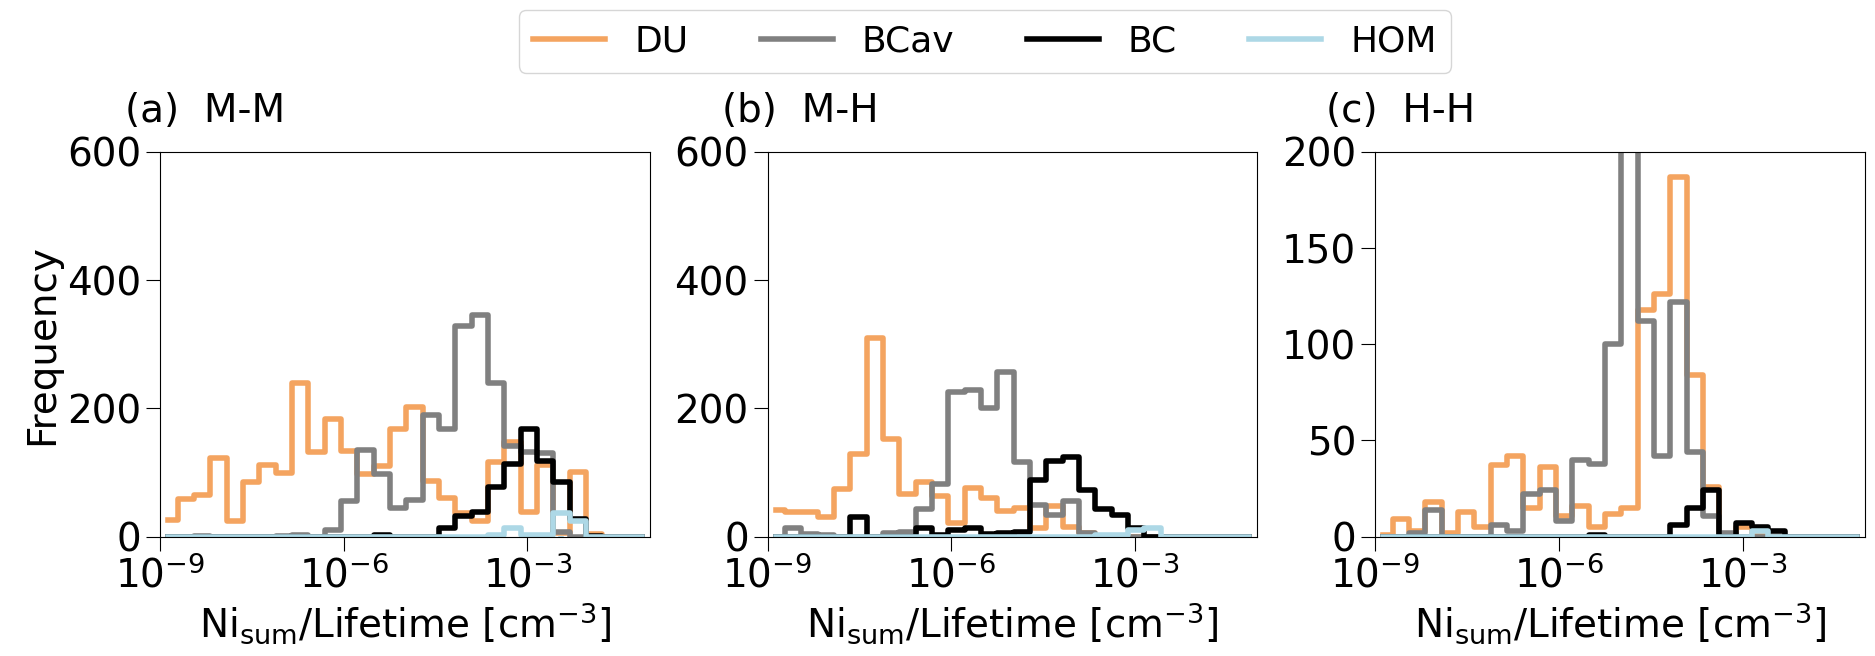

In [48]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(22,5))
gs = GridSpec(1,3, hspace=0.25, wspace=0.24)

custom = Line2D([], [], color='gray', lw=3, linestyle='dashed', label='Median')


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

xmin = 1e-9
xmax = 1e0

edges = np.logspace(np.log10(xmin), np.log10(xmax), num=31)
mids = 10**((np.log10(edges[:-1]) + np.log10(edges[1:]))/2)

thres = 60

seldu = df_NiDU[(df_NiDU.Lat_m < thres)&(df_NiDU.Lat_f < thres)]
selbc = df_NiBC[(df_NiBC.Lat_m < thres)&(df_NiBC.Lat_f < thres)]
selbcav = df_NiBCtag[(df_NiBCtag.Lat_m < thres)&(df_NiBCtag.Lat_f < thres)]
selhom = df_NiHOM[(df_NiHOM.Lat_m < thres)&(df_NiHOM.Lat_f < thres)]

hdu, edges = np.histogram(seldu.Ni, bins=edges)
hbcav, edges = np.histogram(selbcav.Ni, bins=edges)
hbc, edges = np.histogram(selbc.Ni, bins=edges)
hhom, edges = np.histogram(selhom.Ni, bins=edges)

ax1.semilogy(mids, hdu, color='sandybrown', drawstyle='steps-mid', label='DU', linewidth=4)
ax1.semilogy(mids, hbcav, color='gray',drawstyle='steps-mid', label='BCav', linewidth=4)
ax1.semilogy(mids, hbc, color='black', drawstyle='steps-mid', label='BC', linewidth=4)
ax1.semilogy(mids, hhom, color='lightblue',drawstyle='steps-mid', label='HOM', linewidth=4)

seldu = df_NiDU[(df_NiDU.Lat_m >= thres)&(df_NiDU.Lat_f < thres)]
selbc = df_NiBC[(df_NiBC.Lat_m >= thres)&(df_NiBC.Lat_f < thres)]
selbcav = df_NiBCtag[(df_NiBCtag.Lat_m >= thres)&(df_NiBCtag.Lat_f < thres)]
selhom = df_NiHOM[(df_NiHOM.Lat_m >= thres)&(df_NiHOM.Lat_f < thres)]

hdu, edges = np.histogram(seldu.Ni, bins=edges)
hbcav, edges = np.histogram(selbcav.Ni, bins=edges)
hbc, edges = np.histogram(selbc.Ni, bins=edges)
hhom, edges = np.histogram(selhom.Ni, bins=edges)


ax2.semilogy(mids, hdu, color='sandybrown', drawstyle='steps-mid', label='DU', linewidth=4)
ax2.semilogy(mids, hbcav, color='gray',drawstyle='steps-mid', label='BCav', linewidth=4)
ax2.semilogy(mids, hbc, color='black', drawstyle='steps-mid', label='BC', linewidth=4)
ax2.semilogy(mids, hhom, color='lightblue',drawstyle='steps-mid', label='HOM', linewidth=4)

seldu = df_NiDU[(df_NiDU.Lat_m >= thres)&(df_NiDU.Lat_f >= thres)]
selbc = df_NiBC[(df_NiBC.Lat_m >= thres)&(df_NiBC.Lat_f >= thres)]
selbcav = df_NiBCtag[(df_NiBCtag.Lat_m >= thres)&(df_NiBCtag.Lat_f >= thres)]
selhom = df_NiHOM[(df_NiHOM.Lat_m >= thres)&(df_NiHOM.Lat_f >= thres)]

hdu, edges = np.histogram(seldu.Ni, bins=edges)
hbcav, edges = np.histogram(selbcav.Ni, bins=edges)
hbc, edges = np.histogram(selbc.Ni, bins=edges)
hhom, edges = np.histogram(selhom.Ni, bins=edges)

ax3.semilogy(mids, hdu, color='sandybrown', drawstyle='steps-mid', label='DU', linewidth=4)
ax3.semilogy(mids, hbcav, color='gray',drawstyle='steps-mid', label='BCav', linewidth=4)
ax3.semilogy(mids, hbc, color='black', drawstyle='steps-mid', label='BC', linewidth=4)
ax3.semilogy(mids, hhom, color='lightblue',drawstyle='steps-mid', label='HOM', linewidth=4)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_yscale('linear')
ax2.set_yscale('linear')
ax3.set_yscale('linear')
ax1.set_xlabel(r'$\mathrm{Ni} \ [\mathrm{cm^{-3}}]$', fontsize=28)
ax2.set_xlabel(r'$\mathrm{Ni} \ [\mathrm{cm^{-3}}]$', fontsize=28)
ax3.set_xlabel(r'$\mathrm{Ni} \ [\mathrm{cm^{-3}}]$', fontsize=28)
ax1.set_ylabel('Frequency', fontsize=28)
#ax2.set_ylabel('PDF', fontsize=20)
#ax3.set_ylabel('PDF', fontsize=20)

ax1.set_xlim(xmin,xmax)
ax2.set_xlim(xmin, xmax)
ax3.set_xlim(xmin, xmax)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylim(2, 3000)
ax2.set_ylim(2, 3000)
ax3.set_ylim(2, 3000)
#ax1.legend(fontsize=20)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

#plt.setp(ax2.get_yticklabels(), visible=False)
#plt.setp(ax3.get_yticklabels(), visible=False)

ax1.tick_params(axis='both', which='major', length=10, labelsize=28)
ax1.tick_params(axis='both', which='minor', length=5)
ax2.tick_params(axis='both', which='major', length=10, labelsize=28)
ax2.tick_params(axis='both', which='minor', length=5)
ax3.tick_params(axis='both', which='major', length=10, labelsize=28)
ax3.tick_params(axis='both', which='minor', length=5)

handles, labels = ax1.get_legend_handles_labels()
#handles.append(custom)
#labels.append('Median')

ax1.annotate('(a)  M-M', xy=(90, 385), xycoords='figure points', fontsize=28)
ax2.annotate('(b)  M-H', xy=(520, 385), xycoords='figure points', fontsize=28)
ax3.annotate('(c)  H-H', xy=(955, 385), xycoords='figure points', fontsize=28)

fig.legend(handles, labels, bbox_to_anchor=(0.5,1.2), loc='upper center', fontsize=26, ncol=5)